In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dataset = pd.read_csv('Datasets/updated_final_feature_dataset.csv')
X = dataset.drop(['Winner', 'Home Goals', 'Away Goals', 'Season', 'Home Team', 'Away Team'], axis=1)
y = dataset['Winner']

print(dataset.columns)



Index(['Season', 'Home Team', 'Away Team', 'Home Goals', 'Away Goals',
       'Home Team ELO', 'Away Team ELO', 'Home XG', 'Away XG', 'Home XGA',
       'Away XGA', 'Home Win Percentage', 'Home Draw Percentage',
       'Away Win Percentage', 'Away Draw Percentage', 'Home Team Form',
       'Away Team Form', 'Home Team Cumulative Points',
       'Away Team Cumulative Points', 'Winner', 'Home Team Form Statistics',
       'Away Team Form Statistics'],
      dtype='object')


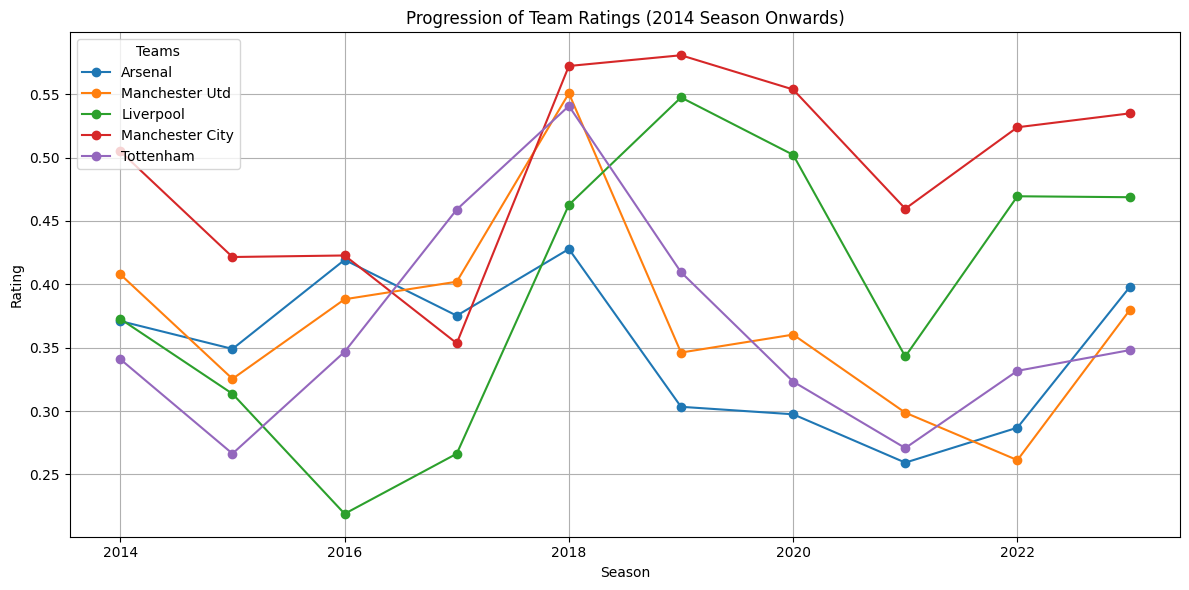

In [37]:
team_ratings = pd.read_csv('Datasets/team_ratings_normalized.csv')

# team_ratings.head()

top_teams = ["Arsenal", "Manchester Utd", "Liverpool", "Manchester City","Tottenham"]

# Filter the dataframe for the selected teams and seasons from 2014 onwards
team_ratings['Season'] = team_ratings['Season'].str.split('-').str[0].astype(int)
filtered_data = team_ratings[
    (team_ratings['Team'].isin(top_teams)) & (team_ratings['Season'] >= 2014)
]

# Plot the progression of ratings
plt.figure(figsize=(12, 6))

for team in top_teams:
    team_data = filtered_data[filtered_data['Team'] == team]
    plt.plot(team_data['Season'], team_data['Rating'], marker='o', label=team)

# Add labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Progression of Team Ratings (2014 Season Onwards)')
plt.legend(title="Teams")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

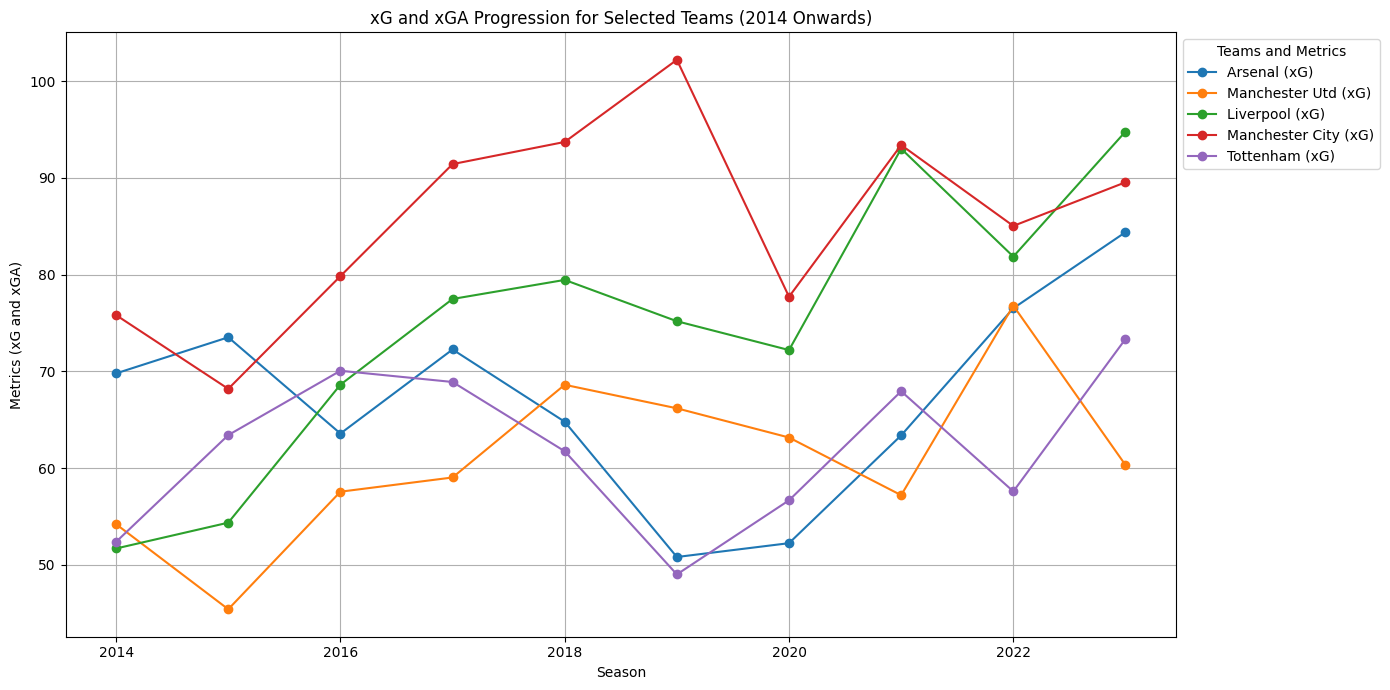

In [38]:
# Read the data
xg_df = pd.read_csv('Datasets/XG_team_features.csv')

# Filter the data for seasons from 2014 onwards
xg_df['Season'] = xg_df['Season'].str.split('/').str[0].astype(int)
xg_df = xg_df[xg_df['Season'] >= 2014]

# Select specific teams to highlight (optional)
highlight_teams = ["Arsenal", "Manchester Utd", "Liverpool", "Manchester City","Tottenham"]

# Plot xG and xGA over seasons for the highlighted teams
plt.figure(figsize=(14, 7))

for team in highlight_teams:
    team_data = xg_df[xg_df['Team'] == team]
    plt.plot(team_data['Season'], team_data['xG'], marker='o', label=f"{team} (xG)")
    # plt.plot(team_data['Season'], team_data['xGA'], marker='x', linestyle='--', label=f"{team} (xGA)")

# Add labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Metrics (xG and xGA)')
plt.title('xG and xGA Progression for Selected Teams (2014 Onwards)')
plt.legend(title="Teams and Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

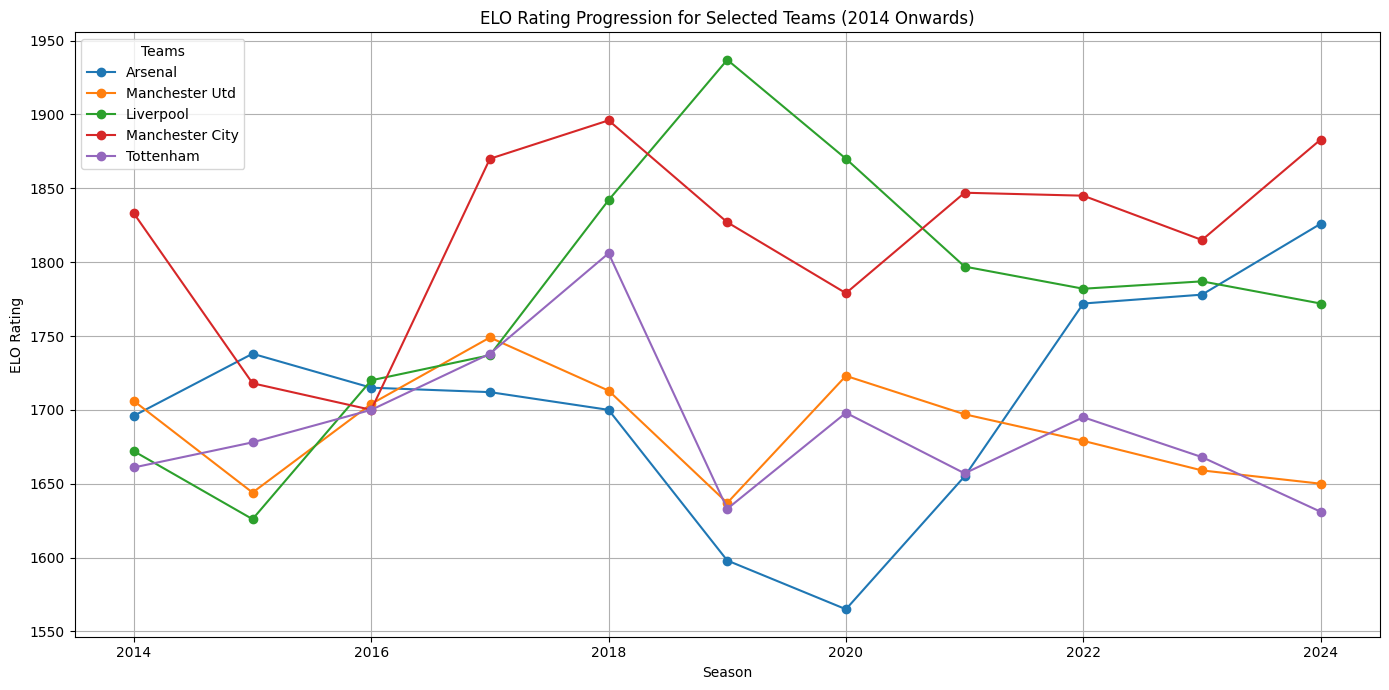

In [39]:
# Read the data
elo_df = pd.read_csv('Datasets/ELO_ratings.csv')

# Parse the date column and extract the year for filtering seasons
elo_df['Date'] = pd.to_datetime(elo_df['Date'])
elo_df['Season'] = elo_df['Date'].dt.year

# Filter data for seasons from 2014 onwards and for the highlighted teams
highlight_teams = ["Arsenal", "Manchester Utd", "Liverpool", "Manchester City", "Tottenham"]
filtered_elo_df = elo_df[
    (elo_df['Season'] >= 2014) &
    (elo_df['Home Team'].isin(highlight_teams) | elo_df['Away Team'].isin(highlight_teams))
]

# Initialize a dictionary to store ELO ratings progression for each team
team_ratings = {team: [] for team in highlight_teams}

# Iterate through the filtered data to compute ratings for the selected teams
for season, matches in filtered_elo_df.groupby('Season'):
    for team in highlight_teams:
        # Get the home and away matches for the team
        home_matches = matches[matches['Home Team'] == team]
        away_matches = matches[matches['Away Team'] == team]

        # Extract the last available rating for the season (assumption: last game represents the end-of-season rating)
        if not home_matches.empty:
            team_ratings[team].append(home_matches.iloc[-1]['Home Team Rating'])
        elif not away_matches.empty:
            team_ratings[team].append(away_matches.iloc[-1]['Away Team Rating'])
        else:
            # If no matches were found for the team in the season, use a placeholder (e.g., None or 0)
            team_ratings[team].append(None)

# Create a DataFrame to prepare for plotting
ratings_df = pd.DataFrame(team_ratings, index=sorted(filtered_elo_df['Season'].unique()))

# Plot ELO ratings progression for highlighted teams
plt.figure(figsize=(14, 7))

for team in highlight_teams:
    plt.plot(ratings_df.index, ratings_df[team], marker='o', label=team)

# Add labels, title, and legend
plt.xlabel('Season')
plt.ylabel('ELO Rating')
plt.title('ELO Rating Progression for Selected Teams (2014 Onwards)')
plt.legend(title="Teams", loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

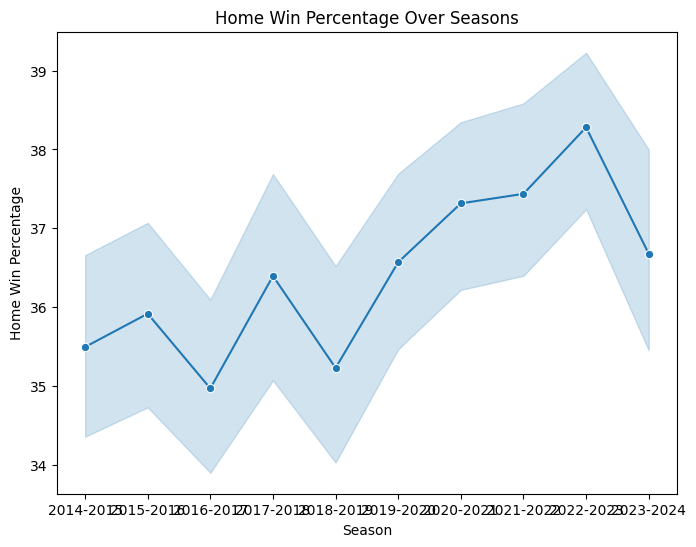

In [40]:
# 7. Seasonal Trends
# Seasonal trends in Home Win Percentage
plt.figure(figsize=(8, 6))
sns.lineplot(x='Season', y='Home Win Percentage', data=dataset, marker='o')
plt.title('Home Win Percentage Over Seasons')
plt.xlabel('Season')
plt.ylabel('Home Win Percentage')
plt.show()


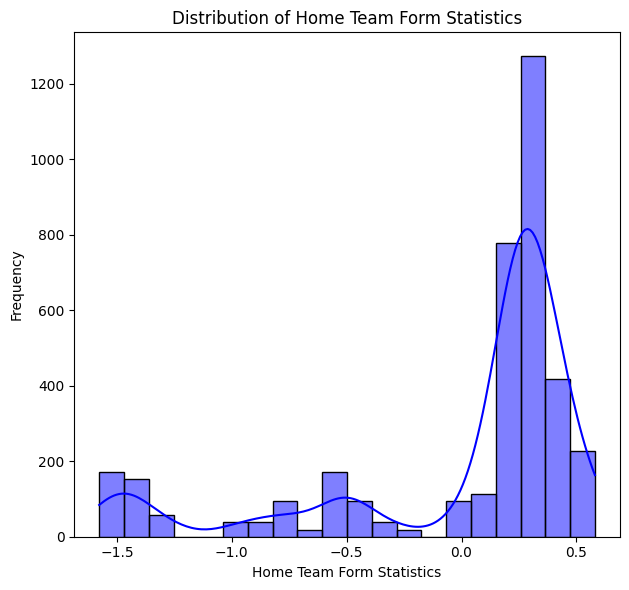

In [41]:
# 1. Distribution of Home and Away Team Form Statistics
plt.figure(figsize=(12, 6))

# Home Team Form Statistics distribution
plt.subplot(1, 2, 1)
sns.histplot(dataset['Home Team Form Statistics'], kde=True, color='blue', bins=20)
plt.title('Distribution of Home Team Form Statistics')
plt.xlabel('Home Team Form Statistics')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

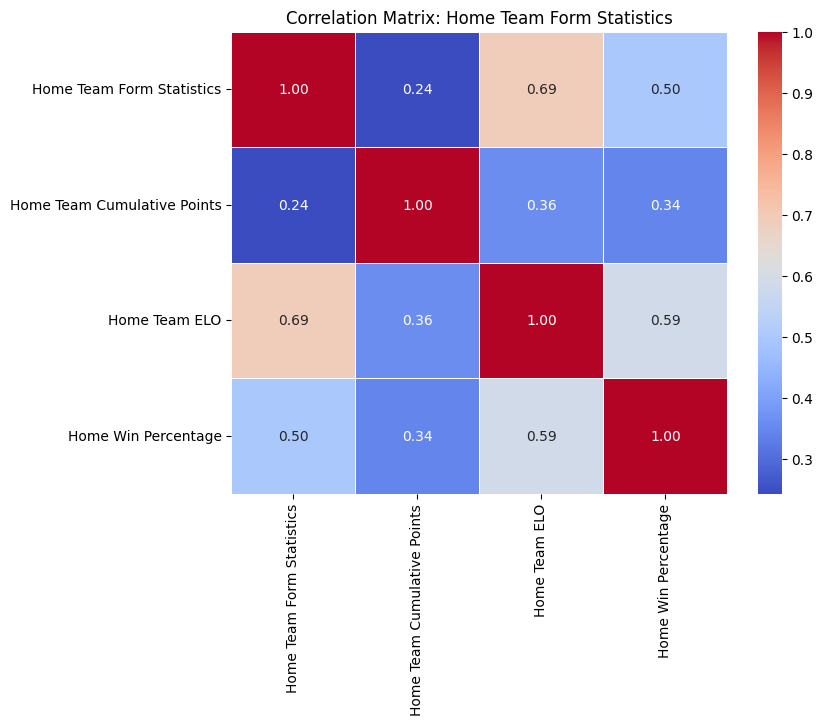

In [42]:
# 2. Correlation Matrix for Home and Away Team Form Statistics with other features
home_form_corr = dataset[['Home Team Form Statistics', 'Home Team Cumulative Points', 'Home Team ELO', 'Home Win Percentage']].corr()
away_form_corr = dataset[['Away Team Form Statistics', 'Away Team Cumulative Points', 'Away Team ELO', 'Away Win Percentage']].corr()

# Plot Home Form Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(home_form_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Home Team Form Statistics')
plt.show()
